<a href="https://colab.research.google.com/github/basilgeorge35/My_Iris_journey/blob/main/PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 3.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.load('x_values.npy')
y = np.load('y_values.npy')

reg = LinearRegression().fit(x, y)

In [ ]:
test_x = np.load('test_x_values.npy')
test_y = reg.predict(test_x)

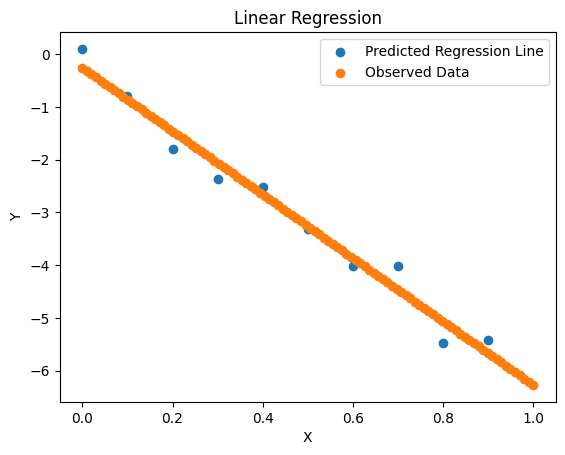

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.scatter(test_x, test_y)
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["Predicted Regression Line", "Observed Data"], loc ="upper right")
plt.show()

In [ ]:
x_p = np.array([0.48]).reshape(-1,1)
y_p = reg.predict(x_p)
print("Predicted value: ",y_p)

Predicted value: [[-3.14442237]]


##Task 3.2

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
wine_d = np.load('wineData.npy')
wine_l = np.load('wineLabels.npy')


*   wine_d.shape --> (178, 13)
*   wine_l.shape --> (178,)









In [ ]:
train_data, test_data, train_label, test_label = train_test_split(wine_d, wine_l, test_size=0.20, shuffle=True)

In [ ]:
#ratio = 0.8
#total_rows = wine_d.shape[0]
#train_size = int(total_rows*ratio)
#train_data = wine_d[0:train_size]
#test_data = wine_d[train_size:]

142


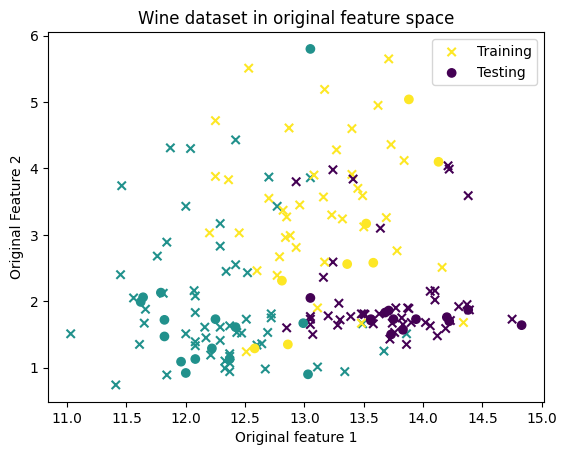

In [ ]:


plt.figure()
plt.scatter(train_data[:,0], train_data[:,1], c=train_label, marker='x')
plt.scatter(test_data[:,0], test_data[:,1], c=test_label, marker='o')
plt.title("Wine dataset in original feature space")
plt.xlabel("Original feature 1")
plt.ylabel("Original Feature 2")
plt.legend(["Training", "Testing"], loc ="upper right")
plt.show()

In [ ]:
train_data.shape

pca = PCA(n_components = 2)
pca.fit(wine_d)
data_pca = pca.transform(wine_d)
train_data, test_data, train_label, test_label = train_test_split(data_pca, wine_l, test_size=0.20, shuffle=True)

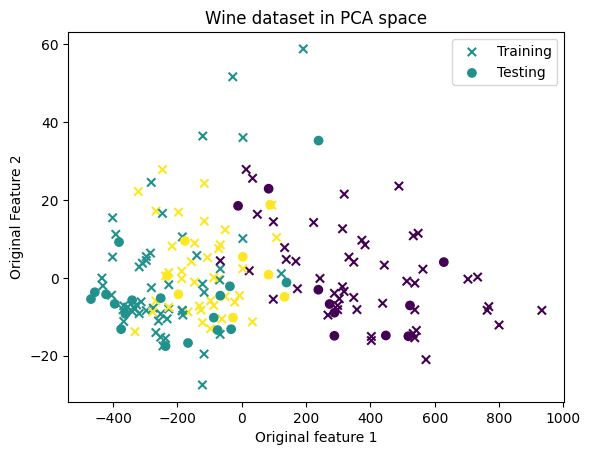

In [ ]:
plt.figure()
plt.scatter(train_data[:,0], train_data[:,1], c=train_label, marker='x')
plt.scatter(test_data[:,0], test_data[:,1], c=test_label, marker='o')
plt.title("Wine dataset in PCA space")
plt.xlabel("Original feature 1")
plt.ylabel("Original Feature 2")
plt.legend(["Training", "Testing"], loc ="upper right")
plt.show()

##Task 3.3

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(wine_d, wine_l, test_size=0.20, shuffle=True)

clf = LinearDiscriminantAnalysis()
clf.fit(train_data, train_label)
tr_data = clf.transform(train_data)
ts_data = clf.transform(test_data)

ts_data.shape

(36, 2)

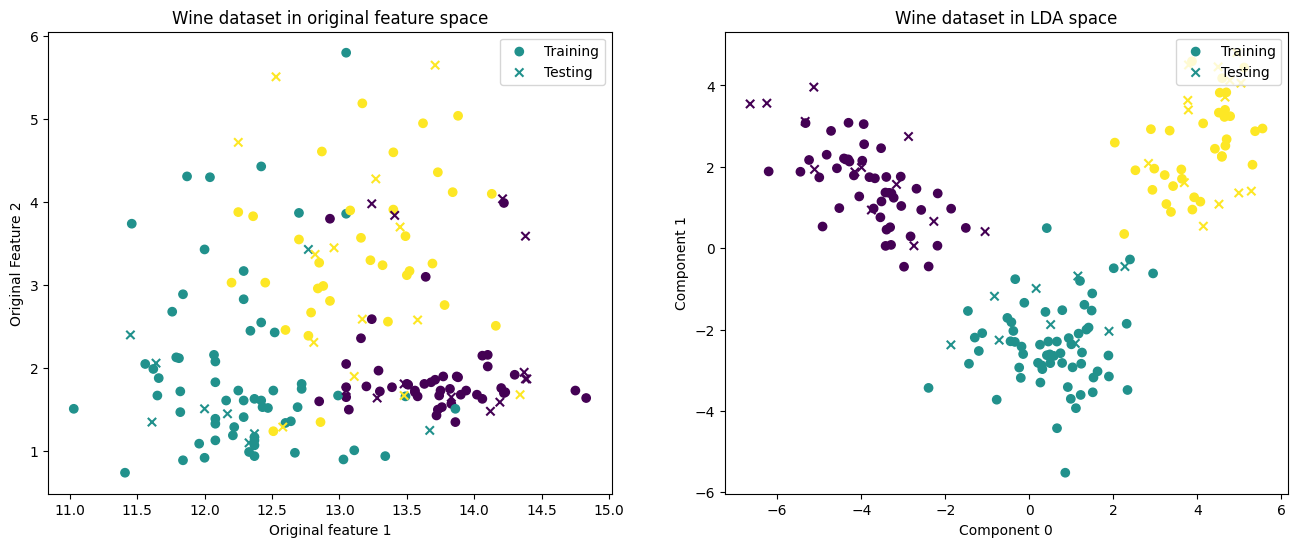

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label, marker='o')
plt.scatter(test_data[:,0], test_data[:,1], c=test_label, marker='x')
plt.title("Wine dataset in original feature space")
plt.xlabel("Original feature 1")
plt.ylabel("Original Feature 2")
plt.legend(["Training", "Testing"], loc ="upper right")
#plt.show()

plt.subplot(1,2,2)
plt.scatter(tr_data[:,0], tr_data[:,1], c=train_label, marker='o') #
plt.scatter(ts_data[:,0], ts_data[:,1], c=test_label, marker='x') #
plt.title("Wine dataset in LDA space")
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.legend(["Training", "Testing"], loc ="upper right")
plt.show()

##Task 3.4

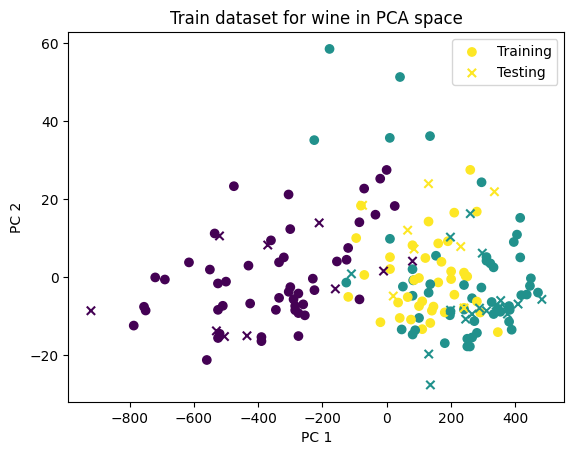

In [ ]:
#Mean Vector
m_vector = np.mean(train_data, axis=0)

#Centering the training datapoints to mean vector
center_tr_data = train_data - m_vector

#Finding SVD
u, s, vh = np.linalg.svd(center_tr_data)

#Projecting the data to 2D Principal Component Space for the best 2 components
components = 2
projection_matrix = vh[:components].T
projected_train_data = np.dot(center_tr_data, projection_matrix)

#Centering the testing datapoints to mean vector
center_ts_data = test_data - m_vector

#Projecting the test data to 2D space as well
projected_test_data = np.dot(center_ts_data, projection_matrix)

#Plotting the train and test data using scactter plot
plt.figure()
plt.scatter(projected_train_data[:,0], projected_train_data[:,1], c=train_label, marker='o')
plt.scatter(projected_test_data[:,0], projected_test_data[:,1], c=test_label, marker='x')
plt.title("Train dataset for wine in PCA space")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(["Training", "Testing"], loc ="upper right")
plt.show()


vh matrix contains the principal components in its columns in descending order of importance. To create the projection matrix, we use .T to transpose vh so that its rows become the components we can use.

We have reduced dimensionality by choosing the best 2 components from vh and then plotting them later.

We mean center the data to move the datapoints such that mean becomes origin. This can reduce the scale of data, which in turn increases the numerical stability while doing matrix operations. It also increases the interpretability of data.

##Task 3.5

In [ ]:
# Loading Data
task_data = np.load('task3_5_data.npy')
task_label = np.load('task3_5_labels.npy')

# Initializing a PCA instance and fitting the data to it
pca = PCA()
pca.fit(task_data)

PCA()

In [ ]:
# Calculating the cumulative explained variance up to each principal component
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Calculating how many components are required to retain 90% variance
num_components = np.argmax(cumulative_variance >= 0.9) + 1
print("Number of components for 90% variance = ",num_components)

Number of components for 90% variance =  87


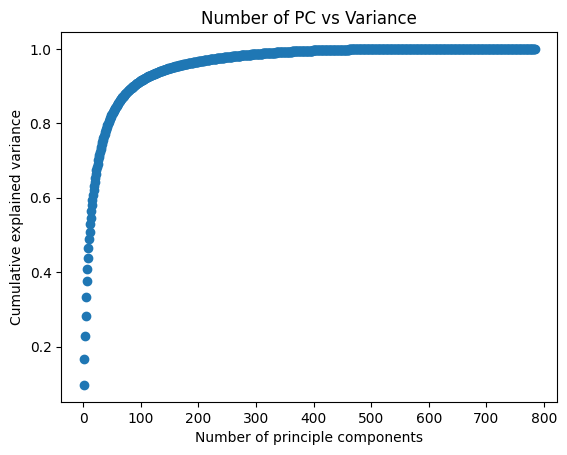

In [ ]:
#Plotting the Number of components required vs the ratio of variance retained. Multiplying the ratio by 100 will give us the percentage of variance retained.

plt.scatter(range(1, len(pca.explained_variance_ratio_) + 1 ), cumulative_variance, marker = 'o')
plt.xlabel("Number of principle components")
plt.ylabel("Cumulative explained variance")
plt.title("Number of PC vs Variance")
plt.show()